In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LinearRegression,
                                  Ridge, 
                                  Lasso, 
                                  ElasticNet)
from sklearn.metrics import (mean_squared_error,
                             r2_score, 
                             mean_squared_log_error,
                             mean_absolute_error)
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (OneHotEncoder,
                                   PolynomialFeatures, 
                                   KBinsDiscretizer, 
                                   MinMaxScaler)

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
X = df.drop('count', axis=1)
y = df['count']

In [4]:
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state = 10)

In [5]:
X_tr.shape, y_tr.shape, X_va.shape, y_va.shape

((8708, 11), (8708,), (2178, 11), (2178,))

In [6]:
df_train = pd.concat([X_tr, y_tr], axis=1)
df_val = pd.concat([X_va, y_va], axis=1)

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
7038,2012-04-11 15:00:00,2,0,1,3,15.58,19.695,46,15.0013,50,152,202
4114,2011-10-03 11:00:00,4,0,1,2,16.40,20.455,71,15.0013,26,100,126
5720,2012-01-13 12:00:00,1,0,1,1,9.84,9.850,38,32.9975,14,140,154
3219,2011-08-04 01:00:00,3,0,1,2,27.06,29.545,94,6.0032,3,14,17
10711,2012-12-12 17:00:00,4,0,1,2,13.12,15.150,53,15.0013,21,540,561


In [8]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
def create_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['week'] = df['datetime'].dt.isocalendar().week
    df['day_of_week'] = df['datetime'].dt.weekday
    df.drop(['datetime'], axis=1, inplace=True)
    
create_datetime(df_train)
create_datetime(df_val)
df_train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week
7038,2,0,1,3,15.58,19.695,46,15.0013,50,152,202,2012,4,11,15,15,2
4114,4,0,1,2,16.40,20.455,71,15.0013,26,100,126,2011,10,3,11,40,0


In [10]:
df_train.isnull().sum() 

season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
year           0
month          0
day            0
hour           0
week           0
day_of_week    0
dtype: int64

In [11]:
df_train[df_train['temp']==0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week


In [12]:
df_train[df_train['humidity']==0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week
1097,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,2011,3,10,8,10,3
1105,1,0,1,3,17.22,21.210,0,16.9979,1,20,21,2011,3,10,16,10,3
1112,1,0,1,3,13.94,17.425,0,6.0032,1,26,27,2011,3,10,23,10,3
1110,1,0,1,3,14.76,17.425,0,15.0013,1,27,28,2011,3,10,21,10,3
1094,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,2011,3,10,5,10,3
1092,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,2011,3,10,1,10,3
1104,1,0,1,3,18.04,21.970,0,15.0013,3,11,14,2011,3,10,15,10,3
1102,1,0,1,3,17.22,21.210,0,15.0013,1,11,12,2011,3,10,13,10,3
1107,1,0,1,3,18.04,21.970,0,23.9994,2,80,82,2011,3,10,18,10,3
1099,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,2011,3,10,10,10,3


In [13]:
spring_hum_mean = df_train[df_train['season']==1]['humidity'].mean()
summer_hum_mean = df_train[df_train['season']==2]['humidity'].mean()
fall_hum_mean = df_train[df_train['season']==3]['humidity'].mean()
winter_hum_mean = df_train[df_train['season']==4]['humidity'].mean()

In [14]:
df_train.loc[(df_train['season'] == 1) & (df_train['humidity']==0), 'humidity'] = spring_hum_mean
df_train.loc[(df_train['season'] == 2) & (df_train['humidity']==0), 'humidity'] = summer_hum_mean
df_train.loc[(df_train['season'] == 3) & (df_train['humidity']==0), 'humidity'] = fall_hum_mean
df_train.loc[(df_train['season'] == 4) & (df_train['humidity']==0), 'humidity'] = winter_hum_mean

df_val.loc[(df_val['season'] == 1) & (df_val['humidity']==0), 'humidity'] = spring_hum_mean
df_val.loc[(df_val['season'] == 2) & (df_val['humidity']==0), 'humidity'] = summer_hum_mean
df_val.loc[(df_val['season'] == 3) & (df_val['humidity']==0), 'humidity'] = fall_hum_mean
df_val.loc[(df_val['season'] == 4) & (df_val['humidity']==0), 'humidity'] = winter_hum_mean

df_train[df_train['humidity']==0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week


In [15]:
df_train[df_train['windspeed']==0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week
8832,3,0,1,2,26.24,28.790,89.0,0.0,21,199,220,2012,8,10,9,32,4
4109,4,0,1,2,14.76,18.940,71.0,0.0,3,91,94,2011,10,3,6,40,0
4272,4,1,0,1,19.68,23.485,88.0,0.0,4,30,34,2011,10,10,1,41,0
442,1,0,1,2,8.20,12.880,86.0,0.0,2,53,55,2011,2,1,12,5,1
9098,3,0,0,2,30.34,34.850,70.0,0.0,226,263,489,2012,9,2,11,35,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7512,2,0,0,1,22.14,25.760,49.0,0.0,87,248,335,2012,5,12,9,19,5
2693,3,0,1,1,26.24,31.060,53.0,0.0,5,6,11,2011,7,1,3,26,4
8281,3,0,1,1,35.26,37.120,30.0,0.0,80,130,210,2012,7,6,10,27,4
574,1,0,1,1,8.20,12.880,80.0,0.0,0,3,3,2011,2,7,2,6,0


In [16]:
def fill_wind(df):
    wind_0 = df[df['windspeed']==0]
    wind_not_0 = df[df['windspeed']!=0]
    y = wind_not_0['windspeed']
    wind_RF = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
    wind_cols = ['season', 'weather', 'temp', 'humidity', 'hour', 'month']
    wind_RF.fit(wind_not_0[wind_cols], y.astype('int'))
    y_pred = wind_RF.predict(wind_0[wind_cols])
    wind_0['windspeed'] = y_pred
    df_wind_RF = wind_not_0.append(wind_0)
    df_wind_RF.reset_index(inplace=True)
    return df_wind_RF

df_train = fill_wind(df_train)
df_val = fill_wind(df_val)
df_train[df_train['windspeed']==0]

/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_63075/1266886403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_0['windspeed'] = y_pred
/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_63075/1266886403.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_wind_RF = wind_not_0.append(wind_0)
/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_63075/1266886403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,index,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week


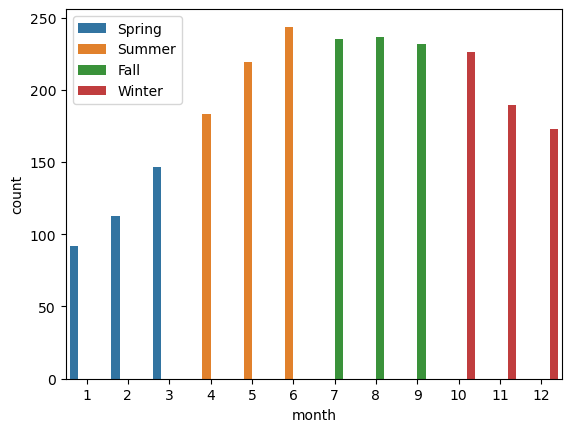

In [17]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
fig, ax = plt.subplots()
sns.barplot(data=df_train, x="month", y="count", hue="season", errorbar=None)
plt.legend(seasons)

In [18]:
df_corr = df_train.drop(['casual', 'registered', 'index', 'atemp'], axis=1)
corr = df_corr.corr()
corr

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour,week,day_of_week
season,1.000000,0.030048,-0.009485,0.004764,0.248050,0.185445,-0.149810,0.156602,-0.009101,0.971535,-0.003869,-0.014409,0.937401,-0.010758
holiday,0.030048,1.000000,-0.249031,-0.003858,-0.009700,0.008069,0.011007,-0.009234,0.005213,0.003596,-0.010900,-0.003738,0.002856,-0.190877
workingday,-0.009485,-0.249031,1.000000,0.027982,0.029380,-0.016822,0.014266,0.014936,-0.004279,-0.005302,0.008222,0.015987,-0.026318,-0.705406
weather,0.004764,-0.003858,0.027982,1.000000,-0.061167,0.422656,-0.010831,-0.133023,-0.015100,0.007351,-0.004456,-0.028945,0.016794,-0.047141
temp,0.248050,-0.009700,0.029380,-0.061167,1.000000,-0.070571,-0.006562,0.397468,0.055761,0.247442,0.010469,0.146930,0.229911,-0.034133
humidity,0.185445,0.008069,-0.016822,0.422656,-0.070571,1.000000,-0.364885,-0.329441,-0.089648,0.201944,-0.003288,-0.277634,0.214717,-0.024384
windspeed,-0.149810,0.011007,0.014266,-0.010831,-0.006562,-0.364885,1.000000,0.119102,-0.016349,-0.153019,0.021072,0.150427,-0.148348,-0.018242
count,0.156602,-0.009234,0.014936,-0.133023,0.397468,-0.329441,0.119102,1.000000,0.251979,0.159958,0.016225,0.399332,0.144654,-0.002919
year,-0.009101,0.005213,-0.004279,-0.015100,0.055761,-0.089648,-0.016349,0.251979,1.000000,-0.009027,0.003349,-0.009458,-0.008209,-0.002612
month,0.971535,0.003596,-0.005302,0.007351,0.247442,0.201944,-0.153019,0.159958,-0.009027,1.000000,-0.001307,-0.014152,0.959693,-0.002756


<AxesSubplot: >

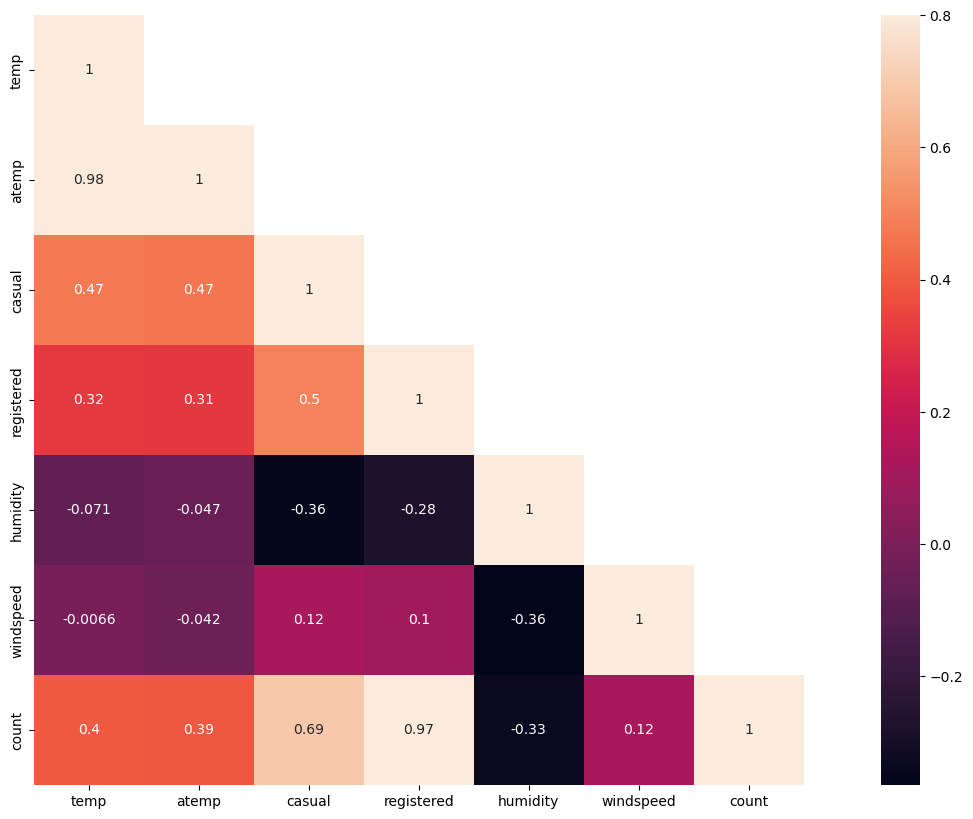

In [19]:
corrMatt = df_train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [45]:
#df_train.groupby(['hour'])['count'].sum().plot.bar()

In [21]:
df_weather1 = df_train.loc[df_train['weather']==1]
df_weather2 = df_train.loc[df_train['weather']==2]
df_weather3 = df_train.loc[df_train['weather']==3]
df_weather4 = df_train.loc[df_train['weather']==4]

/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_63075/2083065726.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_weather1.groupby(['hour'])['casual', 'registered'].sum().plot.bar()


<AxesSubplot: xlabel='hour'>

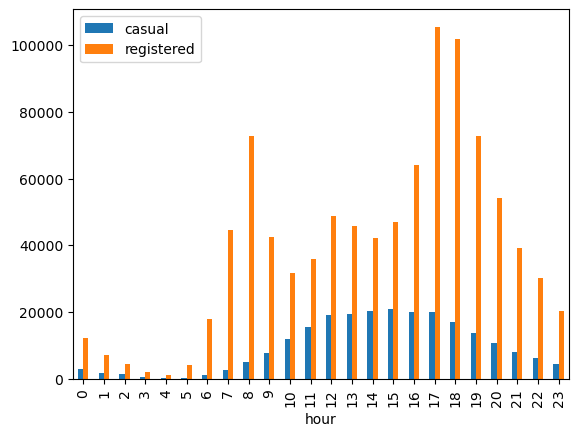

In [22]:
df_weather1.groupby(['hour'])['casual', 'registered'].sum().plot.bar()

/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_63075/1475268749.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_weather2.groupby(['hour'])['casual', 'registered'].sum().plot.bar()


<AxesSubplot: xlabel='hour'>

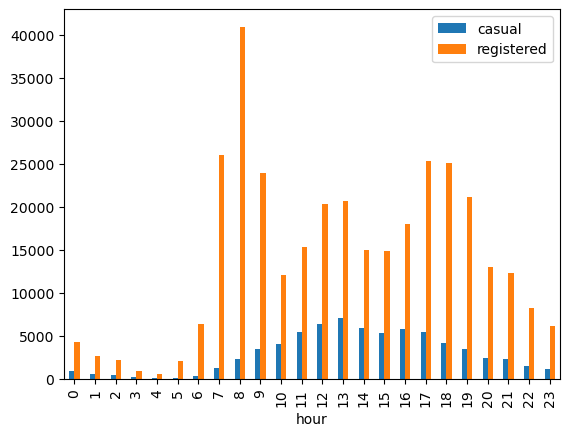

In [23]:
df_weather2.groupby(['hour'])['casual', 'registered'].sum().plot.bar()

/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_63075/3685197904.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_weather3.groupby(['hour'])['casual', 'registered'].sum().plot.bar()


<AxesSubplot: xlabel='hour'>

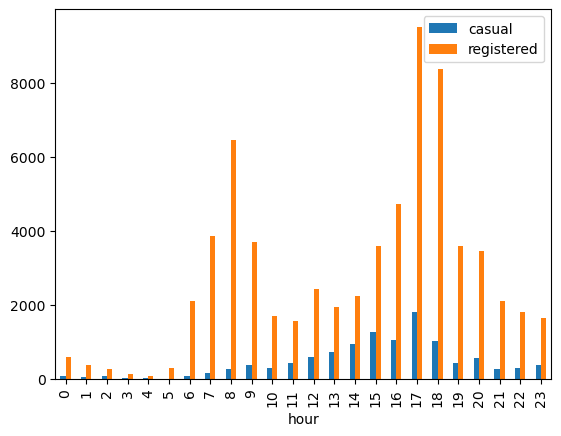

In [24]:
df_weather3.groupby(['hour'])['casual', 'registered'].sum().plot.bar()

In [25]:
df_weather4#.groupby(['hour'])['casual', 'registered'].sum().plot.bar()

,index,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week
6913,5631,1,0,1,4,8.2,11.365,86.0,6.0032,6,158,164,2012,1,9,18,2,0


In [26]:
groupby_hour_season = pd.DataFrame({'mean':df_train.groupby(['hour','season'], 
                                                           sort=True)['count'].mean()}).reset_index()
groupby_hour_weekday = pd.DataFrame({'mean':df_train.groupby(['hour','day_of_week'], 
                                                           sort=True)['count'].mean()}).reset_index()

<AxesSubplot: xlabel='hour', ylabel='mean'>

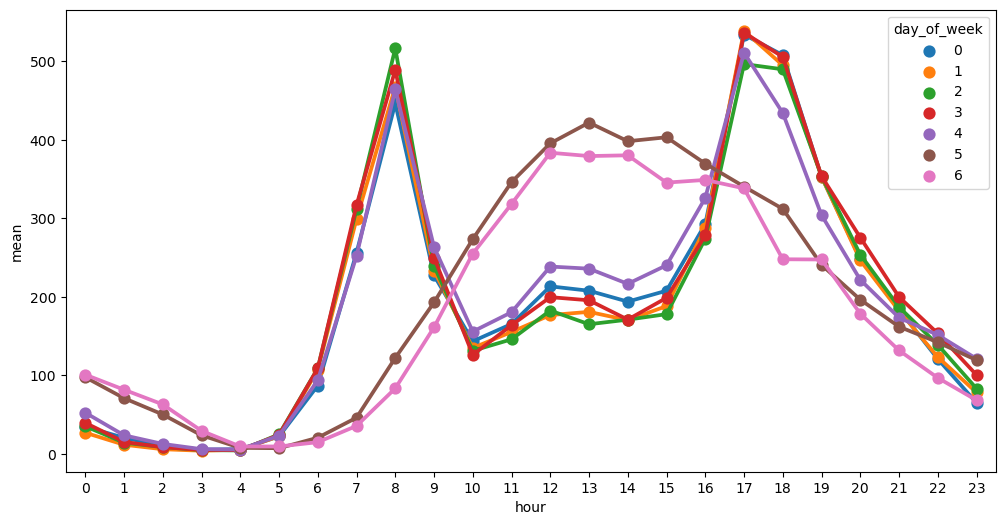

In [27]:
plt.figure(figsize=(12,6))
sns.pointplot(data=groupby_hour_weekday, x="hour", y="mean", hue='day_of_week')

<AxesSubplot: xlabel='hour', ylabel='mean'>

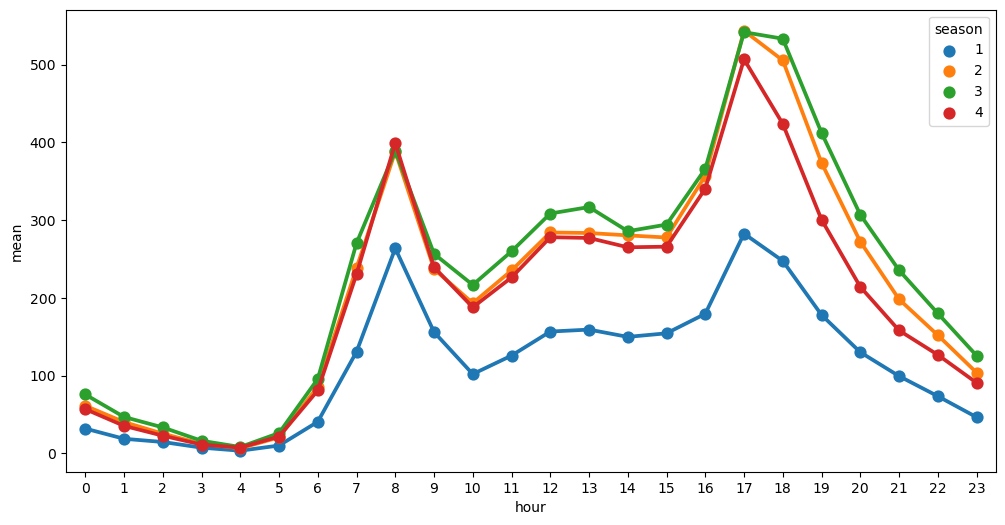

In [28]:
plt.figure(figsize=(12,6))
sns.pointplot(data=groupby_hour_season, x="hour", y="mean", hue='season')

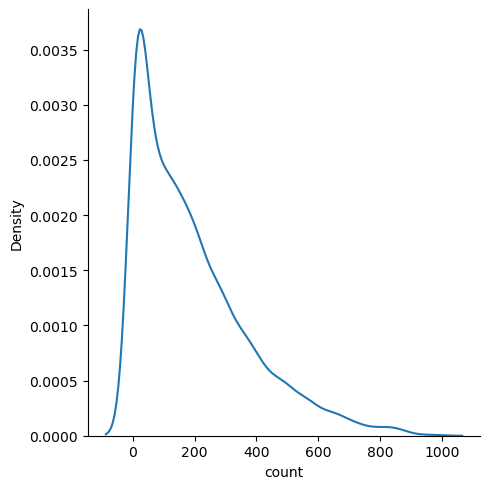

In [29]:
# We can see the need for using log
sns.displot(data=df_train, x="count", kind='kde')

<AxesSubplot: ylabel='Density'>

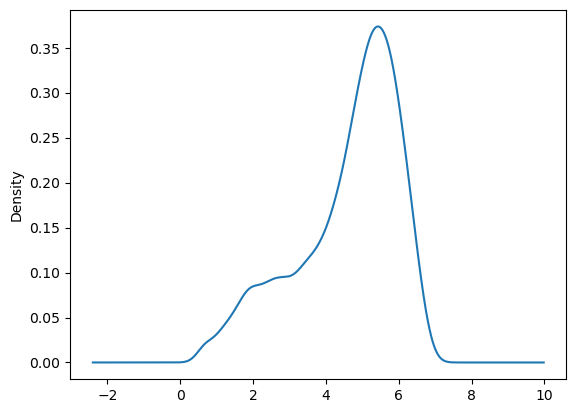

In [30]:
import math
df_train['count_log'] = np.log1p(df_train['count'])
df_train['count_log'].plot(kind='kde')

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

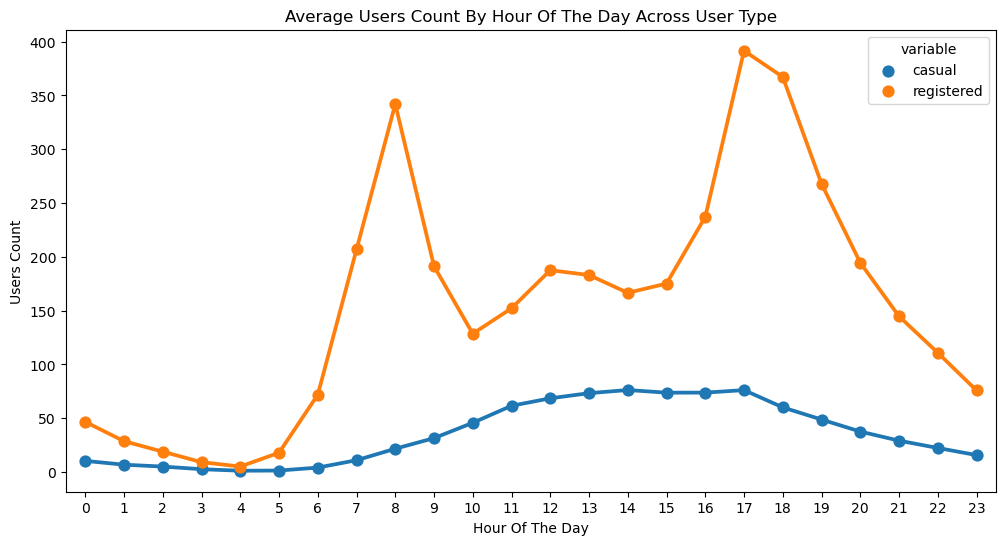

In [31]:
fig,ax = plt.subplots(figsize=(12,6))
hourTransformed = pd.melt(df_train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

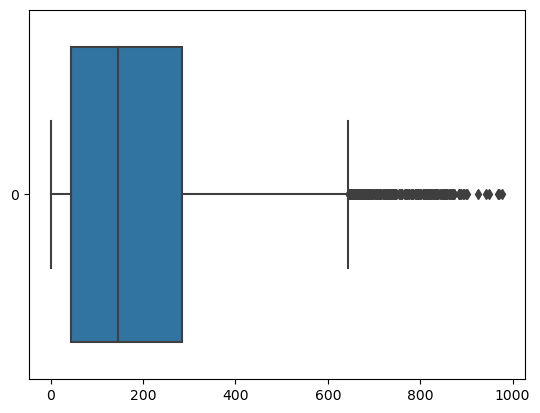

The lower/upper boundary is -348.96883606678165/731.9082021669194
There are 114 outliers based on 3-sigma rule


In [32]:
# calculate the mean and standard deviation of the data
mean = np.mean(df_train['count'])
std = np.std(df_train['count'])

# define the cutoff for what constitutes an outlier
cutoff = 3 * std

# boxplot
sns.boxplot(df_train['count'], orient="h")
plt.show()

# print lower, upper boundry
lower, upper = mean-3*std, mean+3*std
print(f"The lower/upper boundary is {lower}/{upper}")

# identify outliers
outliers = [x for x in df_train['count'] if np.abs(x - mean) > cutoff]
print(f"There are {len(outliers)} outliers based on 3-sigma rule")
#return outliers


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Casual Count'),
 Text(0.5, 1.0, 'Box Plot On Casual Count Across Hour Of The Day')]

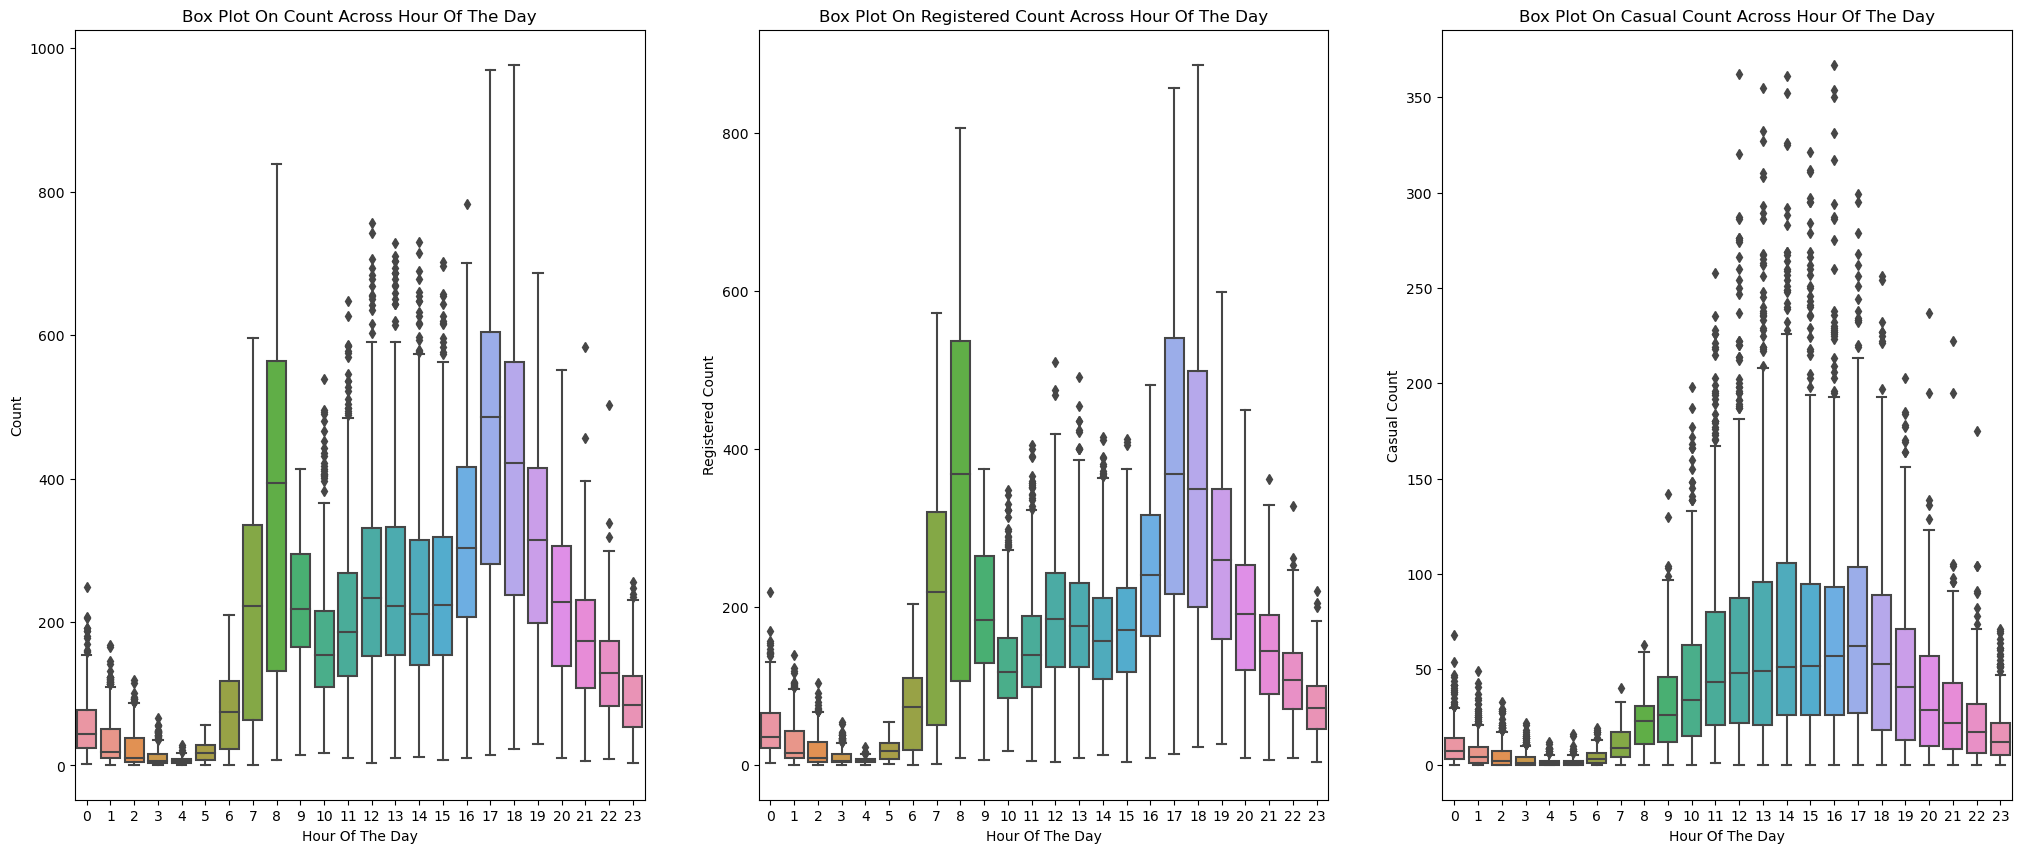

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25, 10)
sns.boxplot(data=df_train,y="count",x="hour",ax=axes[0])
sns.boxplot(data=df_train,y="registered",x="hour",ax=axes[1])
sns.boxplot(data=df_train,y="casual",x="hour",ax=axes[2])
axes[0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1].set(xlabel='Hour Of The Day', ylabel='Registered Count',title="Box Plot On Registered Count Across Hour Of The Day")
axes[2].set(xlabel='Hour Of The Day', ylabel='Casual Count',title="Box Plot On Casual Count Across Hour Of The Day")

In [34]:
#Take out outliers!
def delete_outliers(data, df):
    mean = np.mean(data)
    std = np.std(data)
    outliers=np.abs(data-mean) > (3*std)
    df.drop(index=data[outliers].index, inplace=True)
delete_outliers(df_train['count'], df_train)

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Casual Count'),
 Text(0.5, 1.0, 'Box Plot On Casual Count Across Hour Of The Day')]

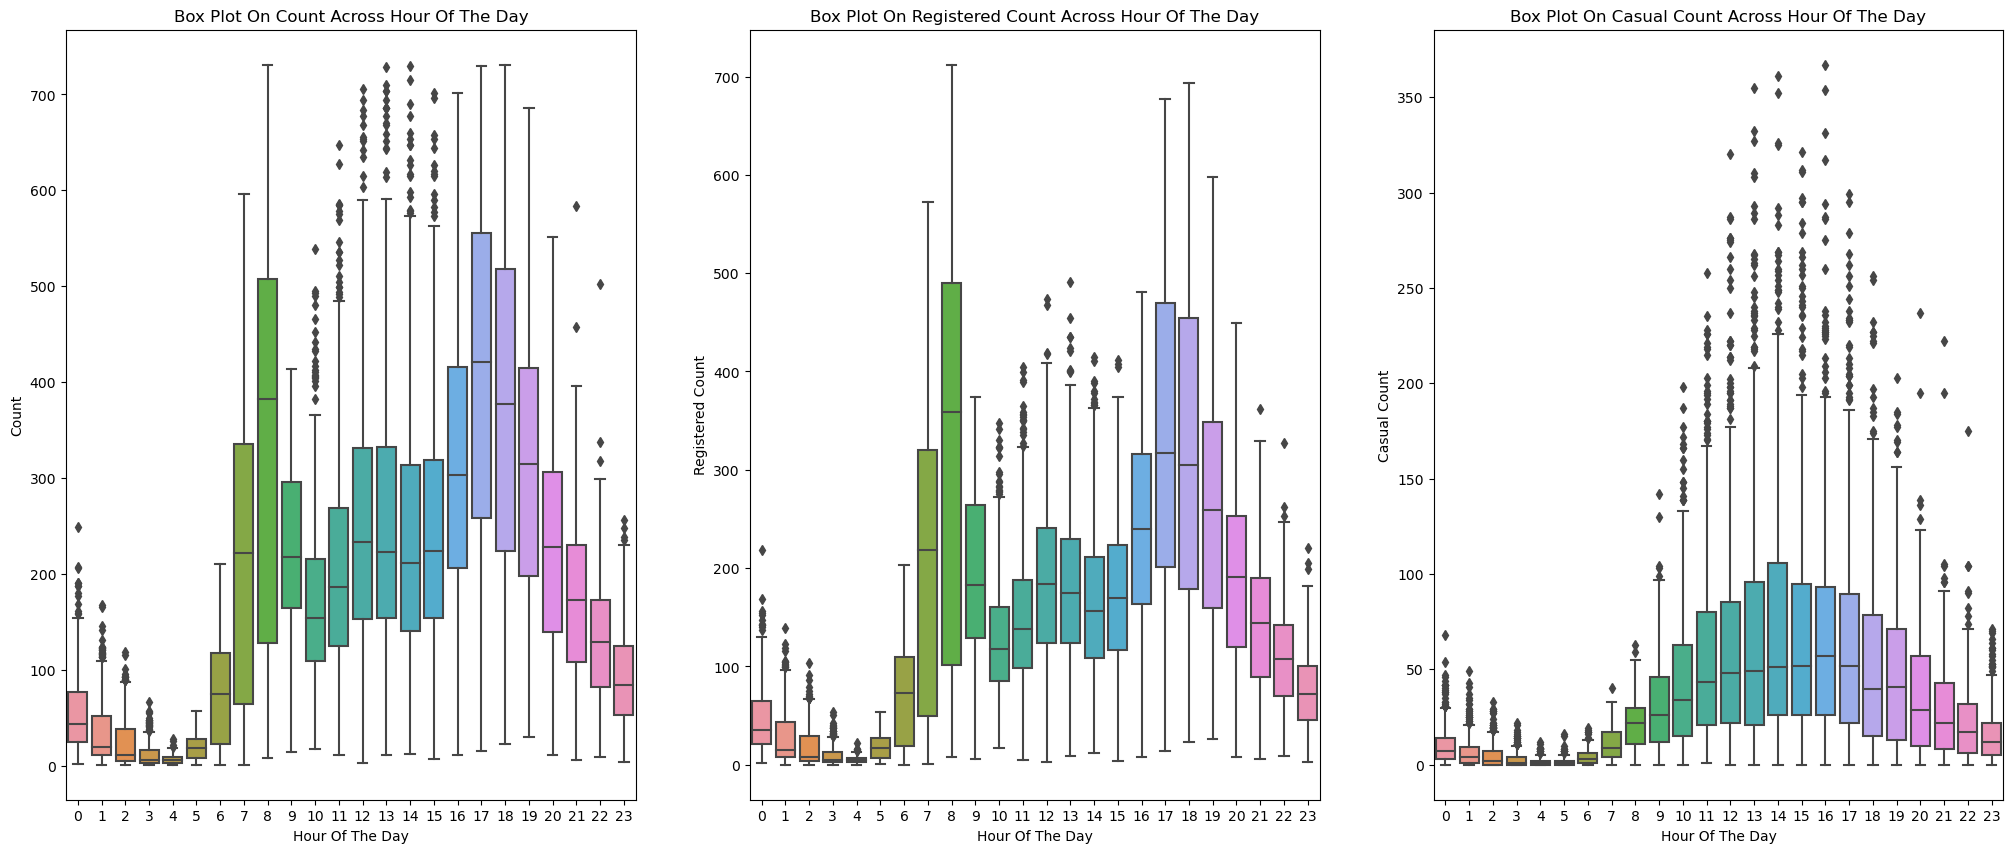

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25, 10)
sns.boxplot(data=df_train,y="count",x="hour",ax=axes[0])
sns.boxplot(data=df_train,y="registered",x="hour",ax=axes[1])
sns.boxplot(data=df_train,y="casual",x="hour",ax=axes[2])
axes[0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1].set(xlabel='Hour Of The Day', ylabel='Registered Count',title="Box Plot On Registered Count Across Hour Of The Day")
axes[2].set(xlabel='Hour Of The Day', ylabel='Casual Count',title="Box Plot On Casual Count Across Hour Of The Day")

In [36]:
#look into 4 models!
#2 for casual and registered with 0 wind
#2 for casual and registered with filled wind

In [43]:
find_avg = pd.DataFrame(df_train.groupby(['hour'])['count','casual','registered'].sum())
percent_cas_hour = find_avg['casual'] / find_avg['count']
percent_reg_hour = find_avg['registered'] / find_avg['count']

find_avg['casual_percent'] = percent_cas_hour
find_avg['registered_percent'] = percent_reg_hour

/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_63075/3535863049.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  find_avg = pd.DataFrame(df_train.groupby(['hour'])['count','casual','registered'].sum())


In [44]:
find_avg

,count,casual,registered,casual_percent,registered_percent
hour,,,,,
0,21033,3843,17190,0.182713,0.817287
1,12546,2429,10117,0.193608,0.806392
2,9046,1934,7112,0.213796,0.786204
3,4068,921,3147,0.226401,0.773599
4,2249,451,1798,0.200534,0.799466
5,7148,537,6611,0.075126,0.924874
6,28095,1556,26539,0.055384,0.944616
7,78448,3983,74465,0.050772,0.949228
8,116695,7158,109537,0.061339,0.938661


In [ ]:
# make two models
# 1 on casual
# 1 on registered
# sum the predictions in the end